# РК № 2 Сафиуллин А.П. 
# РТ5-61Б Вариант № 14
# Задание.
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
# Метод №1
Дерево решений
# Метод №2
Градиентный бустинг


# О наборе данных:
Этот набор данных предназначен для объединения нескольких аспектов данных об образовании в США в один удобный файл CSV (states_all.csv).
* GRADES_PK: количество учащихся дошкольного образования.

* GRADES_4: количество учащихся четвертого класса.

* GRADES_8: количество учащихся восьмого класса.

* GRADES_12: количество учащихся двенадцатого класса.

* GRADES_1_8: количество учащихся с первого по восьмой классы.

* GRADES_9_12: Количество учащихся с девятого по двенадцатый классы.

* GRADES_ALL: количество всех учащихся в штате. Сопоставимо с ENROLL в финансовых данных (это США. оценка Бюро переписи населения для студентов в штате).
* AVG_MATH_4_SCORE: средний балл по штату для четвероклассников, сдающих экзамен по математике NAEP.

* AVG_MATH_8_SCORE: средний балл восьмиклассников штата, сдающих экзамен по математике NAEP.

* AVG_READING_4_SCORE: средний балл по штату для четвероклассников, сдающих экзамен по чтению NAEP.

* AVG_READING_8_SCORE: средний балл по штату для восьмиклассников, сдающих экзамен по чтению NAEP.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))



Подключаем и смотрим характеристики датасета

In [2]:
data = pd.read_csv("/kaggle/input/us-education-datasets-unification-project/states_all.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

Размер набора данных

In [3]:
data.shape

(1715, 25)

Количество пустых значений в датасете

In [4]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [5]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


**Т.к. все колоки с пустыми значениями являются числовыми, заполним пропуски нулями**

In [7]:
data_new_1 = data.fillna(0)
data_new_1.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,0.0,0.0,731634.0,208.0,252.0,207.0,0.0
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,0.0,0.0,122487.0,0.0,0.0,0.0,0.0
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,0.0,0.0,673477.0,215.0,265.0,209.0,0.0
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,0.0,0.0,441490.0,210.0,256.0,211.0,0.0
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,0.0,0.0,5254844.0,208.0,261.0,202.0,0.0


Как видно далее пропуски были заполнены

In [8]:
data_new_1.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

Функция describe оценивает столбцы с числовым типом данных (int или float) и возвращает статистические данные, которые дают представление о распределении значений.

In [9]:
data_new_1.describe().round(2)

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,...,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00,1715.00
mean,2002.08,654851.82,6766826.41,570798.44,3140100.41,3055927.55,6844290.79,3544730.83,1994342.75,306857.11,...,65819.09,64810.42,55593.50,343739.83,176149.27,869736.57,77.86,97.68,82.93,86.37
std,9.57,991834.71,10890358.01,1044206.66,5128133.27,5062007.67,11094169.19,5817668.02,3122649.55,491797.88,...,79398.61,77447.16,66970.12,593347.73,294863.40,1048529.51,111.24,133.00,106.29,123.80
min,1986.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1994.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,14956.00,14656.50,12923.50,0.00,0.00,189272.00,0.00,0.00,0.00,0.00
50%,2002.00,312281.00,2906573.00,253889.00,1546921.00,1125436.00,2930393.00,1534954.00,871613.00,133810.00,...,46094.00,44641.00,38013.00,90001.00,56301.00,597096.00,0.00,0.00,0.00,0.00
75%,2010.00,869448.50,8165744.00,673280.00,3837822.00,3484107.50,8220253.00,4133617.50,2442635.00,407999.50,...,77052.00,76719.50,68023.00,481590.50,252807.50,1002840.50,231.00,274.00,217.00,259.00
max,2019.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,26058021.00,3995951.00,...,493415.00,500143.00,498403.00,3929869.00,2013687.00,6441557.00,253.00,301.00,237.00,280.00


Выведем количество уникальных значений по колонке STATE

In [10]:
data_new_1["STATE"].value_counts()

ALABAMA                 33
ALASKA                  33
NEVADA                  33
NEW_HAMPSHIRE           33
NEW_JERSEY              33
NEW_MEXICO              33
NEW_YORK                33
NORTH_CAROLINA          33
NORTH_DAKOTA            33
OHIO                    33
OKLAHOMA                33
OREGON                  33
PENNSYLVANIA            33
RHODE_ISLAND            33
SOUTH_CAROLINA          33
SOUTH_DAKOTA            33
TENNESSEE               33
TEXAS                   33
UTAH                    33
VERMONT                 33
VIRGINIA                33
WASHINGTON              33
WEST_VIRGINIA           33
WISCONSIN               33
WYOMING                 33
NEBRASKA                33
MONTANA                 33
MISSOURI                33
MISSISSIPPI             33
ARIZONA                 33
ARKANSAS                33
CALIFORNIA              33
COLORADO                33
CONNECTICUT             33
DELAWARE                33
DISTRICT_OF_COLUMBIA    33
FLORIDA                 33
G

In [11]:
data_new_1["STATE"].value_counts(normalize=True)

ALABAMA                 0.019242
ALASKA                  0.019242
NEVADA                  0.019242
NEW_HAMPSHIRE           0.019242
NEW_JERSEY              0.019242
NEW_MEXICO              0.019242
NEW_YORK                0.019242
NORTH_CAROLINA          0.019242
NORTH_DAKOTA            0.019242
OHIO                    0.019242
OKLAHOMA                0.019242
OREGON                  0.019242
PENNSYLVANIA            0.019242
RHODE_ISLAND            0.019242
SOUTH_CAROLINA          0.019242
SOUTH_DAKOTA            0.019242
TENNESSEE               0.019242
TEXAS                   0.019242
UTAH                    0.019242
VERMONT                 0.019242
VIRGINIA                0.019242
WASHINGTON              0.019242
WEST_VIRGINIA           0.019242
WISCONSIN               0.019242
WYOMING                 0.019242
NEBRASKA                0.019242
MONTANA                 0.019242
MISSOURI                0.019242
MISSISSIPPI             0.019242
ARIZONA                 0.019242
ARKANSAS  

# Построим Корреляционную матрицу

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Критерий корреляции Пирсона – это метод параметрической статистики, позволяющий определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость. Другими словами, критерий корреляции Пирсона позволяет определить, изменяется ли (возрастает или уменьшается) один показатель в ответ на изменения другого.
Используем Пирсона т.к. он является наиболее универсальным

<AxesSubplot:>

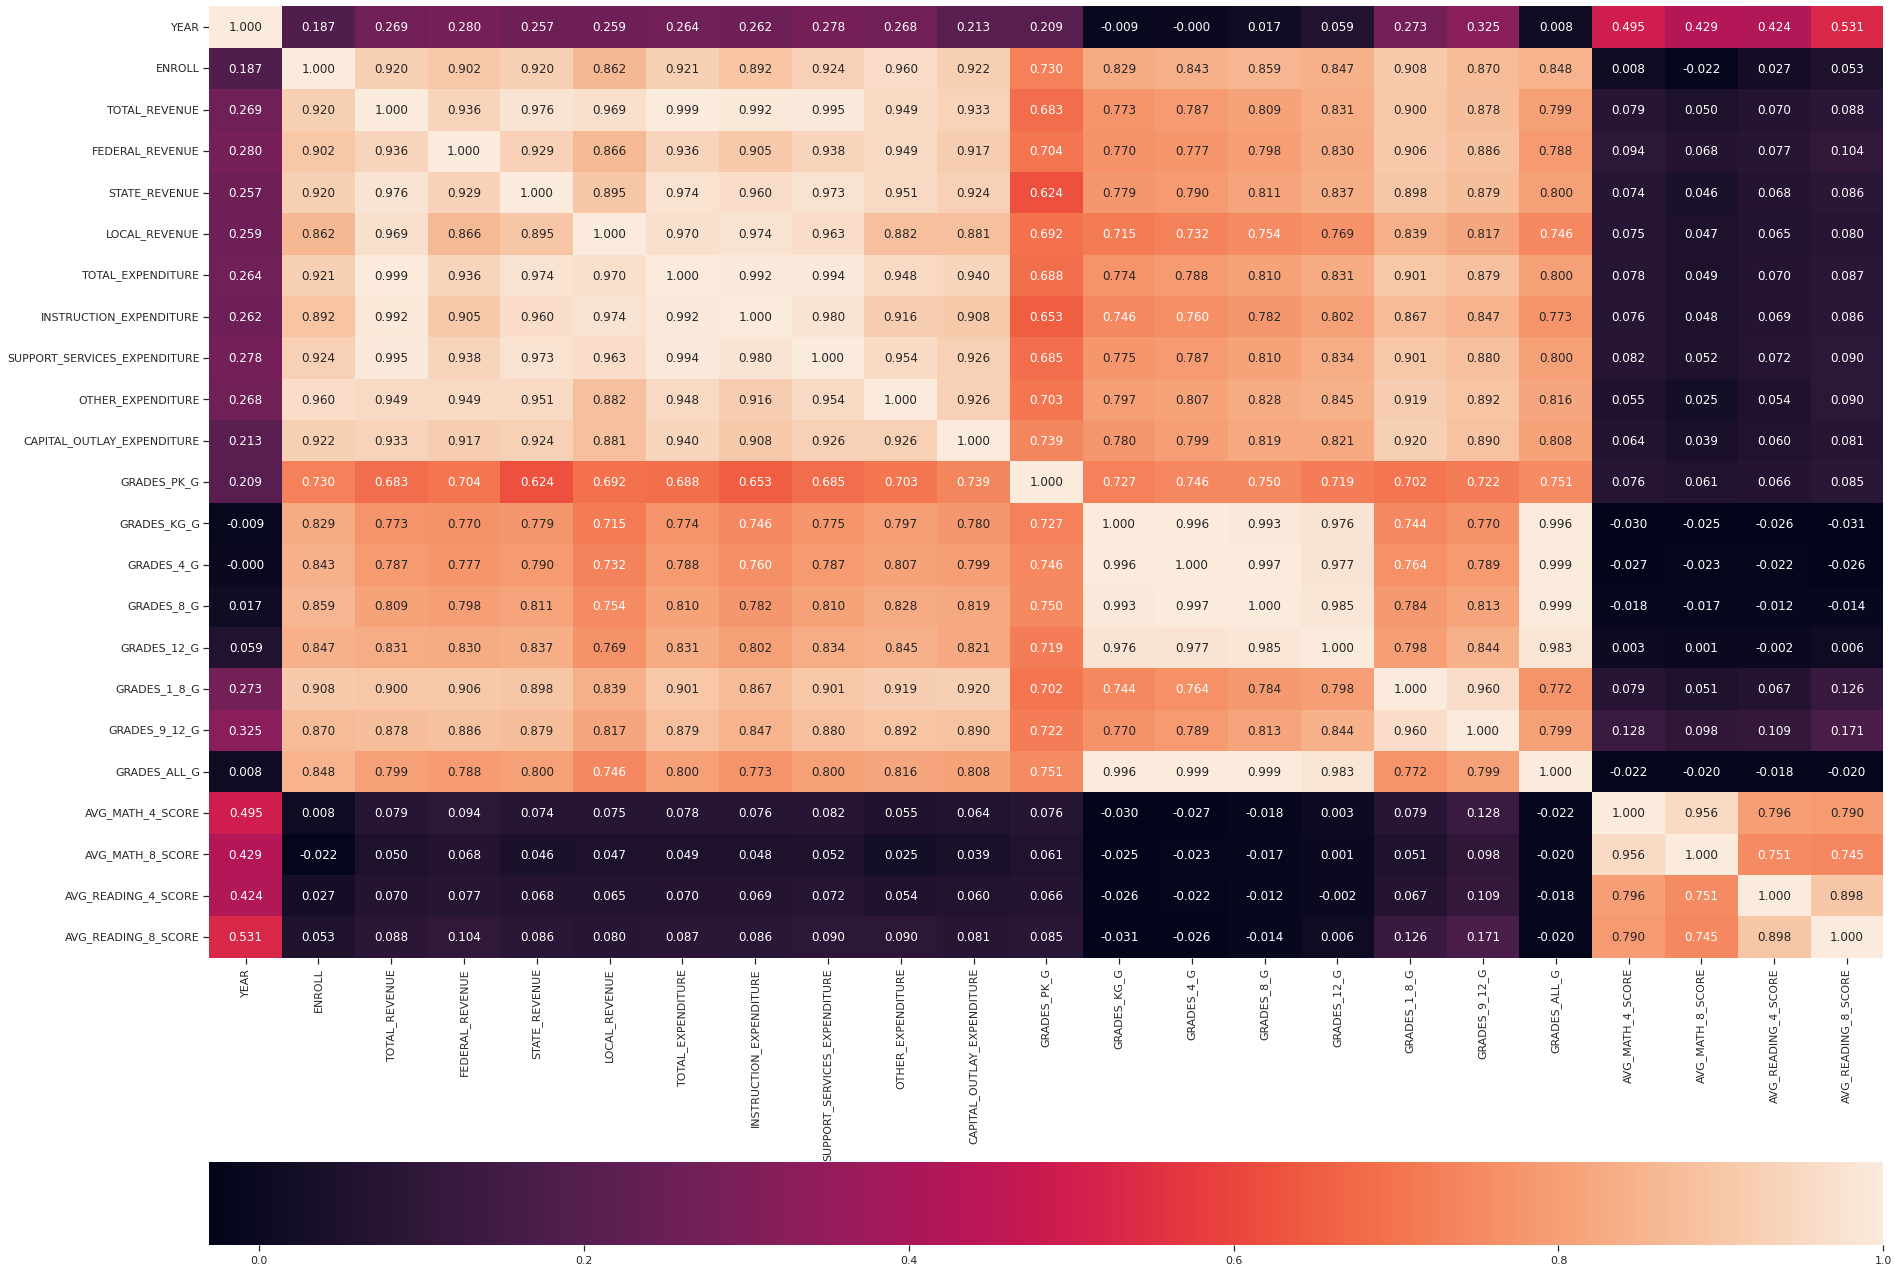

In [13]:

ig, ax = plt.subplots(figsize=(30,25))
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
sns.heatmap(data_new_1.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', cbar_kws= {'orientation': 'horizontal'})

# Значения коэффициента корреляции интерпретируются следующим образом:

* До 0,2 — очень слабая корреляция
* До 0,5 — слабая
* До 0,7 — средняя
* До 0,9 — высокая
* Больше 0,9 — очень высокая
# Корреляция:
Можно наблюдать слабую корреляцию последних 4 колонок от всех остальных. т.к. последние 4 колонки показывают средую качественную оценку экзамена, тогда как остальные выражают количественную оценку учеников 

In [14]:
data_new_1_1 = data_new_1.drop(columns=['YEAR','AVG_READING_8_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_MATH_4_SCORE'])
data_new_1_2 = data_new_1.drop(columns=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'])

<AxesSubplot:>

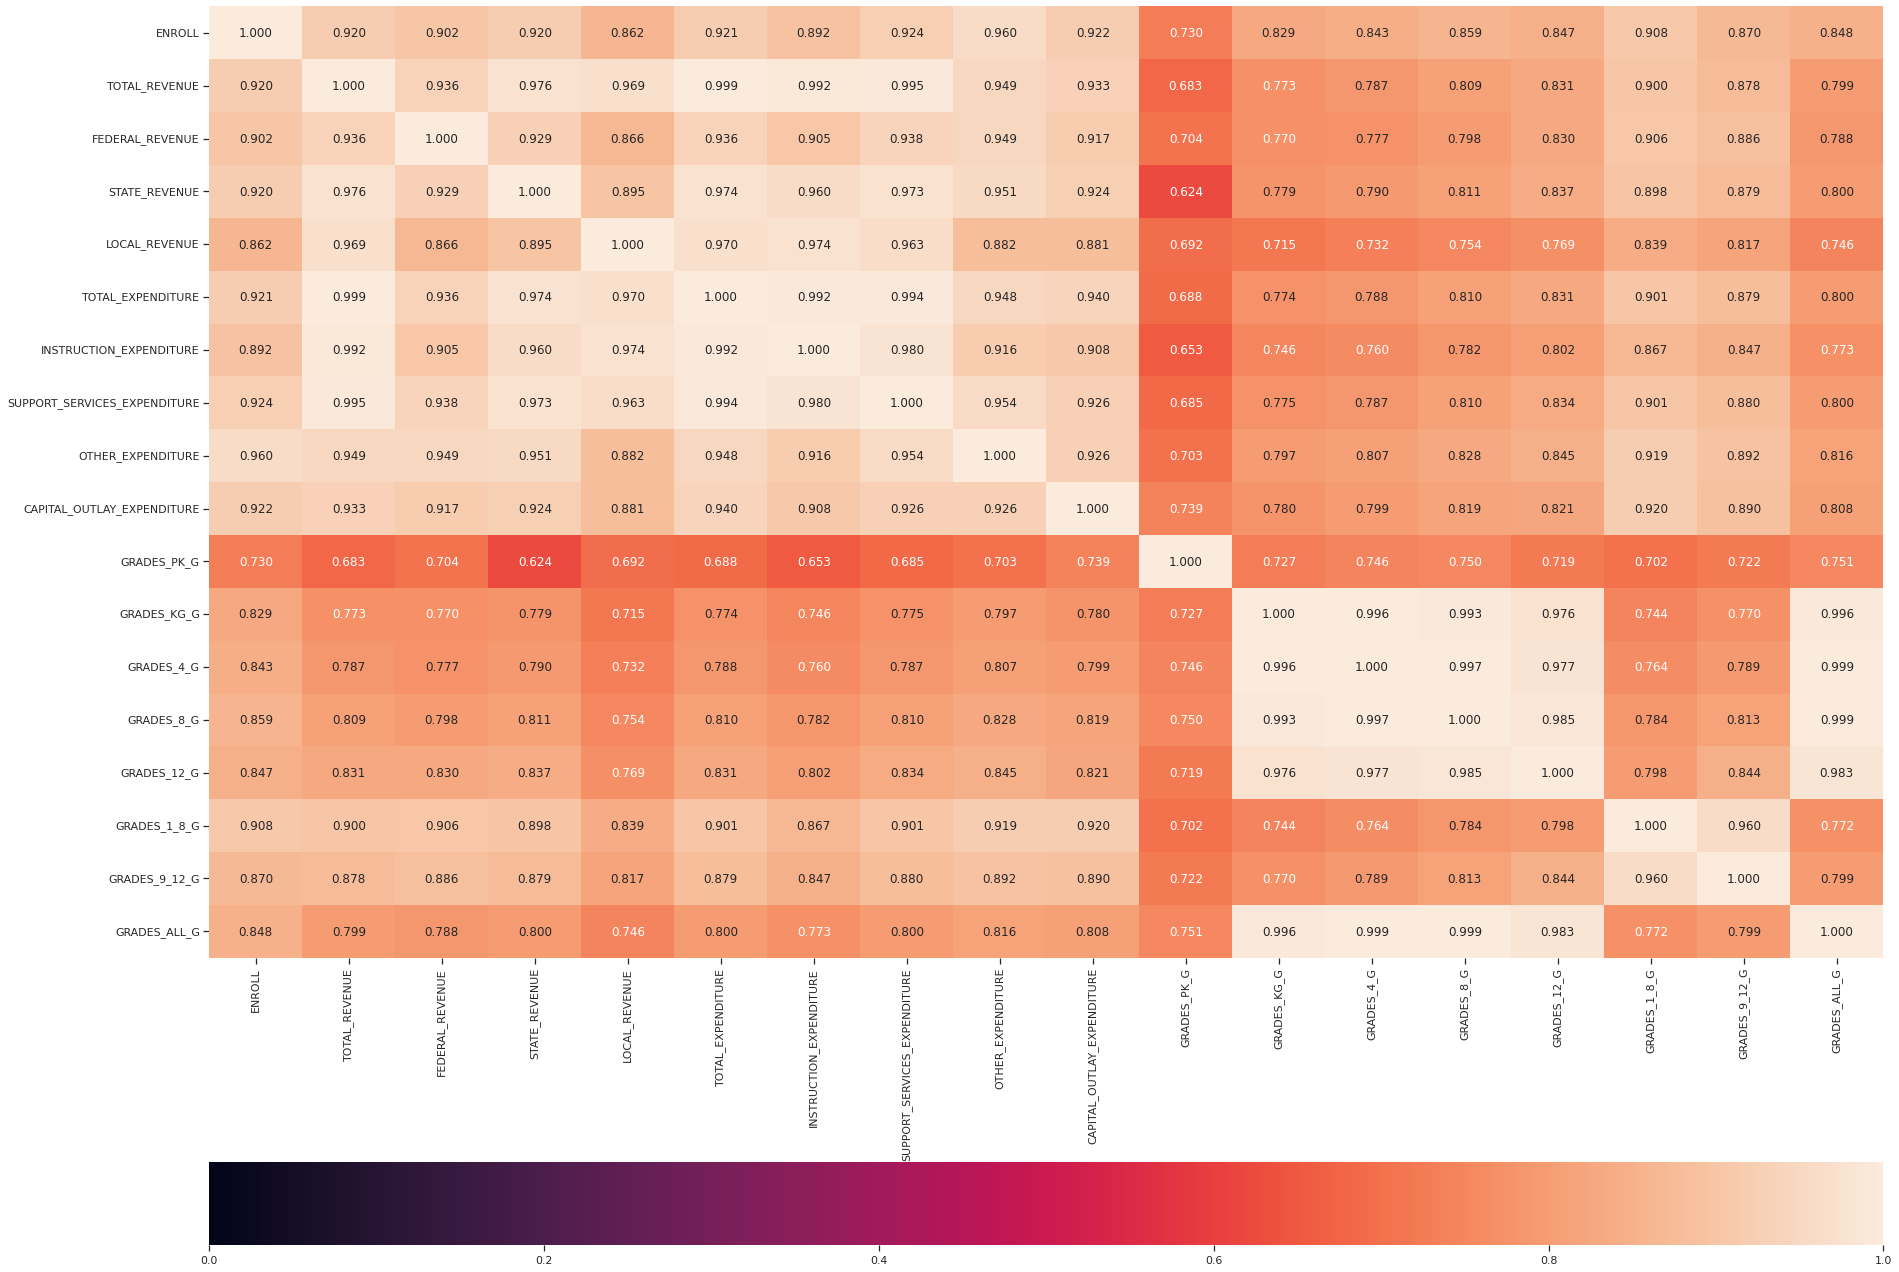

In [15]:
ig, ax = plt.subplots(figsize=(30,25))
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
sns.heatmap(data_new_1_1.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', cbar_kws= {'orientation': 'horizontal'}, vmin = 0)

<AxesSubplot:>

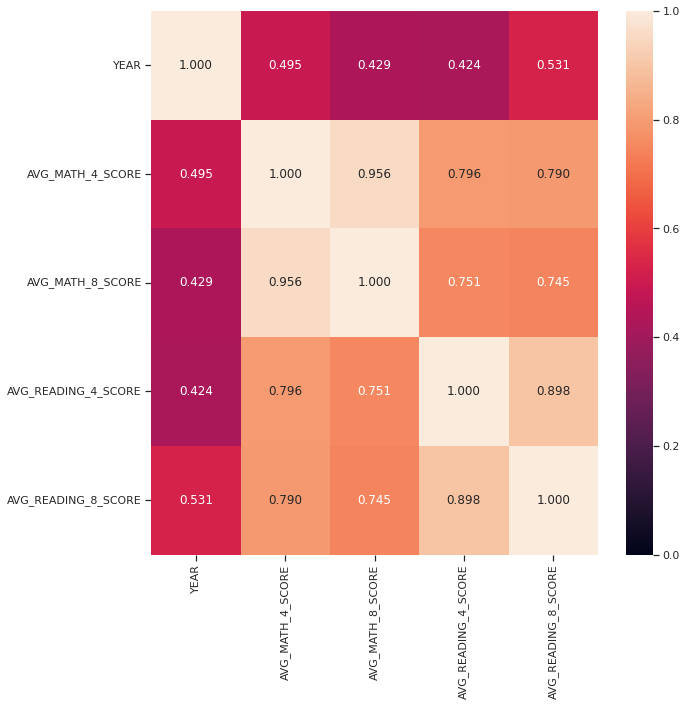

In [16]:
ig, ax = plt.subplots(figsize=(10,10))
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
sns.heatmap(data_new_1_2.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', vmin = 0)

In [17]:
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics 

In [18]:
data_new_1['STATE'].value_counts()

ALABAMA                 33
ALASKA                  33
NEVADA                  33
NEW_HAMPSHIRE           33
NEW_JERSEY              33
NEW_MEXICO              33
NEW_YORK                33
NORTH_CAROLINA          33
NORTH_DAKOTA            33
OHIO                    33
OKLAHOMA                33
OREGON                  33
PENNSYLVANIA            33
RHODE_ISLAND            33
SOUTH_CAROLINA          33
SOUTH_DAKOTA            33
TENNESSEE               33
TEXAS                   33
UTAH                    33
VERMONT                 33
VIRGINIA                33
WASHINGTON              33
WEST_VIRGINIA           33
WISCONSIN               33
WYOMING                 33
NEBRASKA                33
MONTANA                 33
MISSOURI                33
MISSISSIPPI             33
ARIZONA                 33
ARKANSAS                33
CALIFORNIA              33
COLORADO                33
CONNECTICUT             33
DELAWARE                33
DISTRICT_OF_COLUMBIA    33
FLORIDA                 33
G

In [19]:
data_new_1.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, preprocessing
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,  balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

Будем решать задачу регрессии

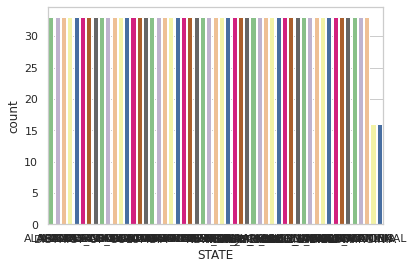

In [21]:
with sns.axes_style('whitegrid'):
 sns.countplot(x='STATE', data=data_new_1, palette='Accent')
 plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
data_new_1["STATE"].unique()
le = LabelEncoder()
state_enc_le = le.fit_transform(data_new_1["STATE"])

In [24]:
le.classes_

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'DODEA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NATIONAL', 'NEBRASKA',
       'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [25]:
np.unique(state_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [26]:

data_new_1_3 = data_new_1.drop(columns = ['PRIMARY_KEY','STATE'])
label = state_enc_le
X_train, X_test, y_train, y_test = train_test_split(
    data_new_1_3, label, test_size=0.3, random_state=1)

In [27]:
y_train

array([17, 47,  5, ..., 26, 33, 43])

# Метрики качества классификации

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.model_selection import train_test_split, GridSearchCV

# Метод № 1

# Дерево решений


Решающие деревья — ещё один алгоритм машинного обучения. Обучение алгоритма представляет собой пошаговое разбиение обучающей выборки на части (чаще всего на две, но в общем случае это не обязательно) по какому-либо признаку. 

# Композиция решающих деревьев
* Решающие деревья могут выявить очень сложные закономерности в обучающей выборке. Но чем лучший результат обучающие деревья показывают на обучении, тем худший результат они покажут на новых данных — деревья переобучаются. Для устранения этой проблемы придуман механизм объединения обучающих деревьев в композиции (леса).

* Для построения композиции деревьев берется N обученных деревьев и их результат “усредняется”. Для задач регрессии (там, где предсказываем число) берется среднее значение предсказанных чисел, а для задач классификации — самый популярный (из N предсказаний) предсказанный класс.
* Таким образом, для построения леса необходимо сначала обучить N решающих деревьев. Но делать это на одной и той же обучающей выборке бессмысленно: мы получим N одинаковых алгоритмов и результат усреднения будет равен результату любого из них. Поэтому для обучения базовых деревьев используется рандомизация: обучение каждого базового дерева производится по случайной подвыборке объектов исходной обучающей выборки и/или по случайному набору параметров (т.е. для обучения каждого базового алгоритма берутся не все параметры объектов, а только случайный набор определенного размера). Но и этого бывает недостаточно для построения независимых алгоритмов — применяют рандомизацию признаков для разбиения на каждой вершине (т.е. на каждой вершине каждого дерева признак выбирают не из всего набора, а из случайной подвыборки признаков определенного размера; важно, что для каждой вершины каждого дерева случайная подвыборка — своя). Поэтому алгоритм и называется композицией случайных деревьев.

# GridSearchCV (решетчатый поиск) param:
* estimator: Предполагается, что это реализует интерфейс оценщика scikit-learn. Либо оценщик должен предоставить функцию оценки, либо оценка должна быть передана. В нашом случае оценщик - дерево
* cv: количество частей, на которые разбиваем выборку для кросс-валидации; их ещё называют "folds"
* param_griddict: 


In [29]:
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 3}


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [31]:
best_tree = grid_cv.best_estimator_
best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_test)
print_metrics(y_test, y_pred_tree)

R^2: 0.34259356114341155
RMSE: 155.888259978425
MAE: 6.685307443365696


# Метод № 2

# Градиентный бустинг

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [33]:
abc =  AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
y_pred_abc = abc.predict(X_test)
y_pred_abc_1 = abc.predict(X_train)
print_metrics(y_test, y_pred_abc)

R^2: -0.2434330054940086
RMSE: 294.8504854368932
MAE: 14.431067961165049


In [35]:
accuracy_score(y_train,y_pred_abc_1)

0.0725

In [36]:
accuracy_score(y_test,y_pred_abc)

0.038834951456310676